### Import all the libraries for the Model

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt
import pandas as pd
import collections
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Load the clean dataset and explore its content

In [2]:
data = pd.read_csv("sample_sales_car_clean.csv",encoding='latin1')
df = data.copy()

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

Unnamed: 0                           int64
PENALTY_POINTS                       int64
NO_DRIVERS                           int64
CHILDREN_U16                       float64
TP_XS_A                              int64
VOL_XS_A                             int64
NO_COLOUR_CHG                        int64
dr1_penalty_points                 float64
dr7_age                              int64
dr8_age                              int64
LEGAL_OWNER_I_Y                      int64
TRAILER_I_B                          int64
TRAILER_I_E                          int64
TRAILER_I_J                          int64
TRAILER_I_N                          int64
TRAILER_I_Y                          int64
PROV_I_Y                             int64
MAIN_DRIVE_I_Y                       int64
INSURED_EXCL_I_Y                     int64
PAY_METHOD_C_SF                      int64
PAY_METHOD_C_X                       int64
AA_MEMBER_I_X                        int64
AA_MEMBER_I_Y                        int64
GENDER_C_F 

In [4]:
df.head()

,Unnamed: 0,PENALTY_POINTS,NO_DRIVERS,CHILDREN_U16,TP_XS_A,VOL_XS_A,NO_COLOUR_CHG,dr1_penalty_points,dr7_age,dr8_age,...,telematics_i_Yes,Partnership_credit_union,Partnership_education,Partnership_gov_semi_state,Partnership_health_board,Partnership_none,Partnership_other_epay,Partnership_pp_plan,Partnership_unknown,fraud
0,0,0,1,0.0,0,0,0,0.000000,999,999,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,99.0,0,250,0,0.000000,999,999,...,0,0,0,0,0,1,0,0,0,0
2,2,0,1,99.0,0,0,0,0.000000,999,999,...,0,0,0,0,0,1,0,0,0,0
3,3,0,1,99.0,0,100,0,0.000000,999,999,...,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0.0,0,0,0,0.108106,999,999,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
df.head()

,PENALTY_POINTS,NO_DRIVERS,CHILDREN_U16,TP_XS_A,VOL_XS_A,NO_COLOUR_CHG,dr1_penalty_points,dr7_age,dr8_age,LEGAL_OWNER_I_Y,...,telematics_i_Yes,Partnership_credit_union,Partnership_education,Partnership_gov_semi_state,Partnership_health_board,Partnership_none,Partnership_other_epay,Partnership_pp_plan,Partnership_unknown,fraud
0,0,1,0.0,0,0,0,0.000000,999,999,1,...,0,0,0,0,0,1,0,0,0,0
1,0,1,99.0,0,250,0,0.000000,999,999,1,...,0,0,0,0,0,1,0,0,0,0
2,0,1,99.0,0,0,0,0.000000,999,999,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,99.0,0,100,0,0.000000,999,999,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0.0,0,0,0,0.108106,999,999,1,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df.isnull().sum().sum()

0

### Assign the target (independent) variable to y and the remaining (dependent) variables to X

In [8]:
X = df.iloc[:,:-1]
y = df.fraud

### Split the data in 2, 80% for the training set and 20% for the testing set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Check the variable distribution before Smote

In [10]:
 collections.Counter(Y_train)

Counter({0: 147218, 1: 70})

### Overbalancing only done on the training set

In [11]:
smt = SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)

### Check the variable distribution after Smote, now it is balanced

In [12]:
collections.Counter(Y_train) # balanced

Counter({0: 147218, 1: 147218})

### Execute a Feature Scaling on the X train and Test

In [13]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Run Decision Tree Classifier to obtain the most important variables in the dataset that contribute in the frauds

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
paracolumnas = X_train.columns
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = paracolumnas,
                                   columns=['importance']).sort_values('importance', ascending=False)


<AxesSubplot:title={'center':'Importance Vars RF'}, xlabel='index'>

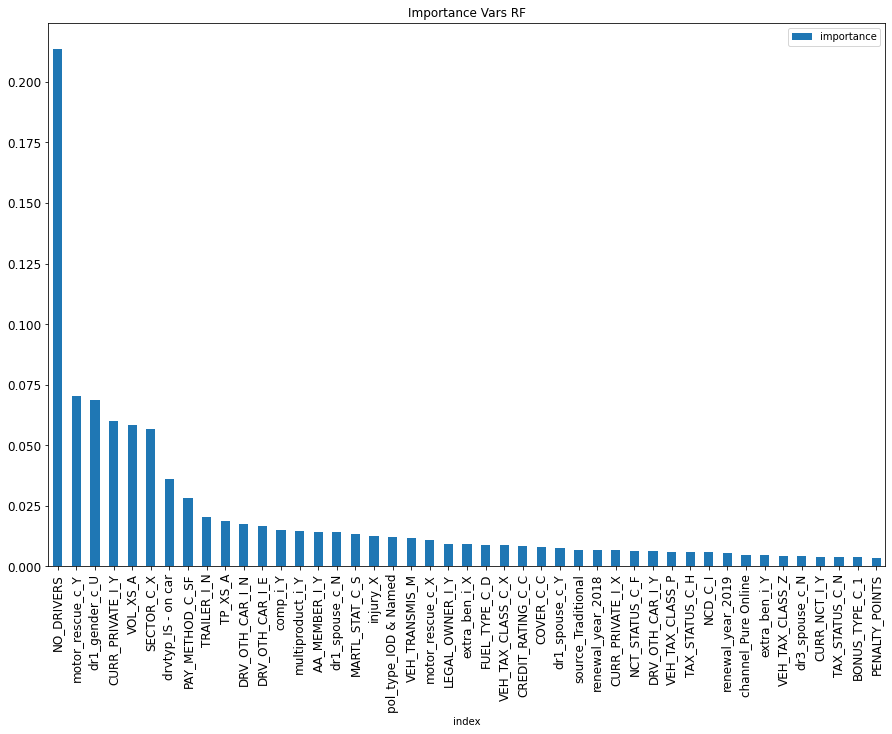

In [15]:
feature_importances.reset_index(inplace=True)
dfpinta = feature_importances.head(45)
dfpinta.reset_index(drop=False, inplace=True)
dfpinta
dfpinta.plot('index', 'importance', kind='bar', title ="Importance Vars RF", figsize=(15, 10), legend=True, fontsize=12)

### Apply Logistic Regression algorithm and get the Confusion Matrix

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train_sc, Y_train)

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
Y_pred_l = logreg.predict(X_test_sc)

In [18]:
Y_pred_tresh_l = (Y_pred_l > 0.40)
cm_l = confusion_matrix(Y_test, Y_pred_tresh_l)

In [19]:
cm_l

array([[36798,     3],
       [   21,     1]], dtype=int64)

### Performance matrices for Logistic Regression prediction

In [20]:
total_l=sum(sum(cm_l))

accuracy_l=(cm_l[0,0]+cm_l[1,1])/total_l
print ('Accuracy : ', accuracy_l)

sensitivity_l = cm_l[0,0]/(cm_l[0,0]+cm_l[0,1])
print('Sensitivity : ', sensitivity_l)

specificity_l = cm_l[1,1]/(cm_l[1,0]+cm_l[1,1])
print('Specificity : ', specificity_l)

print( 'F1 Score:' , f1_score(Y_test, Y_pred_tresh_l, average="macro"))
print( 'Precision:' , precision_score(Y_test, Y_pred_tresh_l, average="macro"))
print( 'Recall:' , recall_score(Y_test, Y_pred_tresh_l, average="macro")) 

Accuracy :  0.9993482334410558
Sensitivity :  0.999918480476074
Specificity :  0.045454545454545456
F1 Score: 0.5382985392765344
Precision: 0.6247148211521225
Recall: 0.5226865129653098


### ROC, Lift Curve and CGC for Logistic Regression

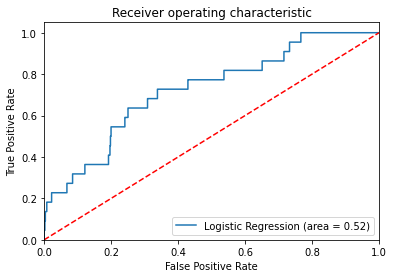

In [22]:
logit_roc_auc = roc_auc_score(Y_test, Y_pred_l)
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test_sc)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

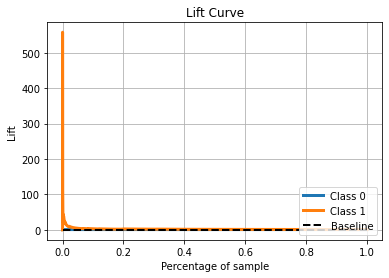

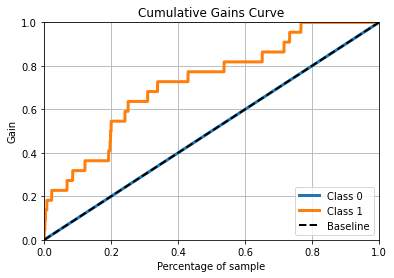

In [23]:
Y_test_pred_l = logreg.predict_proba(X_test_sc)[:]
skplt.metrics.plot_lift_curve(Y_test, Y_test_pred_l)
plt.show()
skplt.metrics.plot_cumulative_gain(Y_test, Y_test_pred_l)
plt.show()

### Apply Decision Tree algorithm and get the Confusion Matrix

In [24]:
Y_pred_d = clf.predict(X_test)

In [25]:
Y_pred_tresh_d = (Y_pred_d > 0.40)
cm_d = confusion_matrix(Y_test, Y_pred_tresh_d)

In [26]:
cm_d

array([[36752,    49],
       [   22,     0]], dtype=int64)

### Performance matrices for Decision Tree prediction

In [27]:
total_d=sum(sum(cm_d))

accuracy_d=(cm_d[0,0]+cm_d[1,1])/total_d
print ('Accuracy : ', accuracy_d)

sensitivity_d = cm_d[0,0]/(cm_d[0,0]+cm_d[0,1])
print('Sensitivity : ', sensitivity_d)

specificity_d = cm_d[1,1]/(cm_d[1,0]+cm_d[1,1])
print('Specificity : ', specificity_d)

print( 'F1 Score:' , f1_score(Y_test, Y_pred_tresh_d, average="macro"))
print( 'Precision:' , precision_score(Y_test, Y_pred_tresh_d, average="macro"))
print( 'Recall:' , recall_score(Y_test, Y_pred_tresh_d, average="macro")) 

Accuracy :  0.9980718572631236
Sensitivity :  0.9986685144425423
Specificity :  0.0
F1 Score: 0.4995174991505267
Precision: 0.4997008756186436
Recall: 0.49933425722127117


### ROC, Lift Curve and CGC for Decision Tree

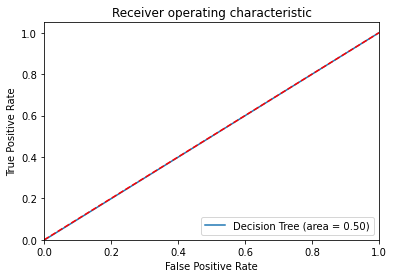

In [28]:
dt_roc_auc = roc_auc_score(Y_test, Y_pred_d)
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

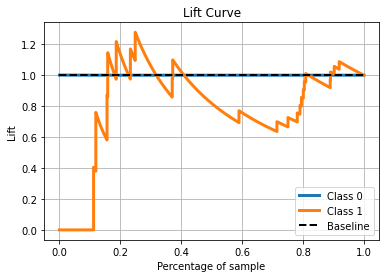

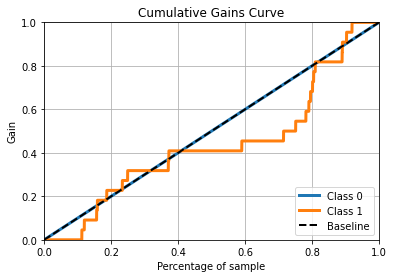

In [29]:
Y_test_pred_d = clf.predict_proba(X_test)[:]
skplt.metrics.plot_lift_curve(Y_test, Y_test_pred_d)
plt.show()
skplt.metrics.plot_cumulative_gain(Y_test, Y_test_pred_d)
plt.show()

### Apply Random Forest algorithm and get the Confusion Matrix

In [30]:
rf_model = RandomForestClassifier(n_estimators=28, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=28, random_state=0)

In [31]:
Y_pred_r = rf_model.predict(X_test)

In [32]:
Y_pred_tresh_r = (Y_pred_r > 0.4)
cm_r = confusion_matrix(Y_test, Y_pred_tresh_r)

In [33]:
cm_r

array([[36801,     0],
       [   22,     0]], dtype=int64)

### Performance matrices for Random Forest prediction

In [34]:
total_r =sum(sum(cm_r))

accuracy_r=(cm_r[0,0]+cm_r[1,1])/total_r
print ('Accuracy : ', accuracy_r)

sensitivity_r = cm_r[0,0]/(cm_r[0,0]+cm_r[0,1])
print('Sensitivity : ', sensitivity_r)

specificity_r = cm_r[1,1]/(cm_r[1,0]+cm_r[1,1])
print('Specificity : ', specificity_r)

print( 'F1 Score:' , f1_score(Y_test, Y_pred_tresh_r, average="macro"))
print( 'Precision:' , precision_score(Y_test, Y_pred_tresh_r, average="macro"))
print( 'Recall:' , recall_score(Y_test, Y_pred_tresh_r, average="macro")) 

Accuracy :  0.9994025473209679
Sensitivity :  1.0
Specificity :  0.0
F1 Score: 0.4998505921981962
Precision: 0.49970127366048395
Recall: 0.5


C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC, Lift Curve and CGC for Random Forest

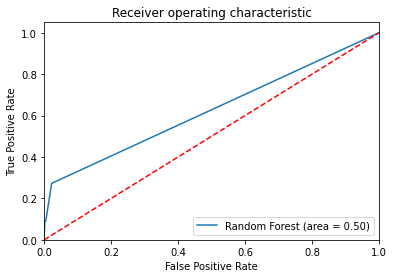

In [35]:
rf_roc_auc = roc_auc_score(Y_test, Y_pred_r)
fpr, tpr, thresholds = roc_curve(Y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

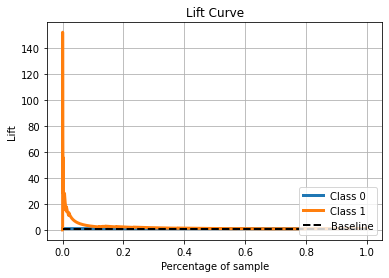

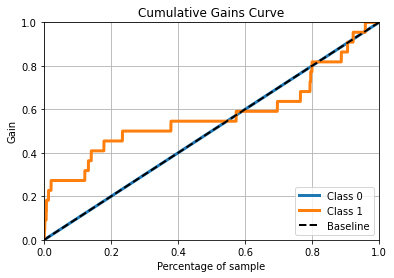

In [36]:
Y_test_pred_r = rf_model.predict_proba(X_test)[:]
skplt.metrics.plot_lift_curve(Y_test, Y_test_pred_r)
plt.show()
skplt.metrics.plot_cumulative_gain(Y_test, Y_test_pred_r)
plt.show()

### Define parameters, execute GridSearch in all parameters and show the best parameters for Logistic Regression

In [37]:
param_lr = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [38]:
CV_lr = GridSearchCV(estimator=logreg, param_grid=param_lr, cv= 5)
CV_lr.fit(X_train, Y_train)

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\JMesa\.c

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\JMesa\.c

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\JMesa\.c

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\JMesa\.c

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\JMesa\.c

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.98754908        nan 0.98369761        nan 0.9749148
        nan 0.9886156         nan 0.98625844        nan 0.99503118
        nan 0.99278621        nan 0.98160886]
  warnings.warn(
C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']})

In [39]:
CV_lr.best_params_

{'C': 5, 'penalty': 'l2'}

### Define parameters, execute GridSearch in all parameters and show the best parameters for Decision Tree

In [40]:
param_dt = {
    'criterion' :['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : [2,4,6,8,10,12],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced','none']    
}

In [41]:
CV_dt = GridSearchCV(estimator=clf, param_grid=param_dt, cv= 5)
CV_dt.fit(X_train, Y_train)

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\tree\_classes.py", line 209, in fit
    expanded_class_weight = compute_sample_weight(
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\JMesa\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\class_weight.py", line 122, in compute_sample_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', 'none'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [42]:
CV_dt.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'splitter': 'best'}

### Define parameters, execute GridSearch in all parameters and show the best parameters for Random Forest

In [43]:
param_rf = { 
    'n_estimators': [200, 500],
    'criterion' :['gini', 'entropy'],
    'max_depth' : [4,5,6,7,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_jobs': [-1,1,-2]    
}

In [44]:
CV_rf = GridSearchCV(estimator=rf_model, param_grid=param_rf, cv= 5)
CV_rf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=28, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500], 'n_jobs': [-1, 1, -2]})

In [45]:
CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500,
 'n_jobs': -1}